Using Colab cache for faster access to the 'lung-cancer-prediction-dataset' dataset.
======== Preview of Data ======== 
Sample of the data:
   age  gender  education_years  income_level  smoker  smoking_years  \
0   60       1               20             2       1             16   
1   53       0               12             4       0              0   
2   62       1               15             3       1              9   
3   73       1               12             3       0              0   
4   52       1               13             1       0              0   

   cigarettes_per_day  pack_years  passive_smoking  air_pollution_index  ...  \
0                  15          12                0                   71  ...   
1                   0           0                1                   66  ...   
2                  29          13                1                   69  ...   
3                   0           0                0                   47  ...   
4                   0      

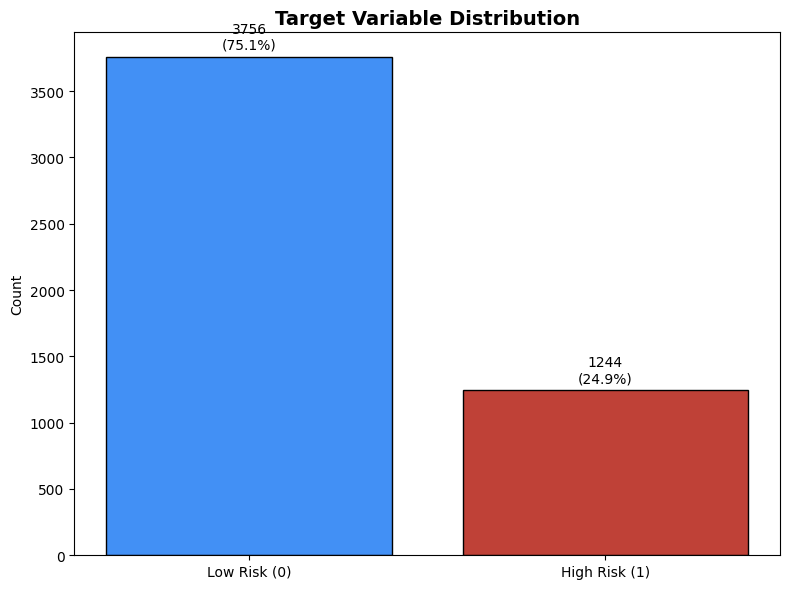

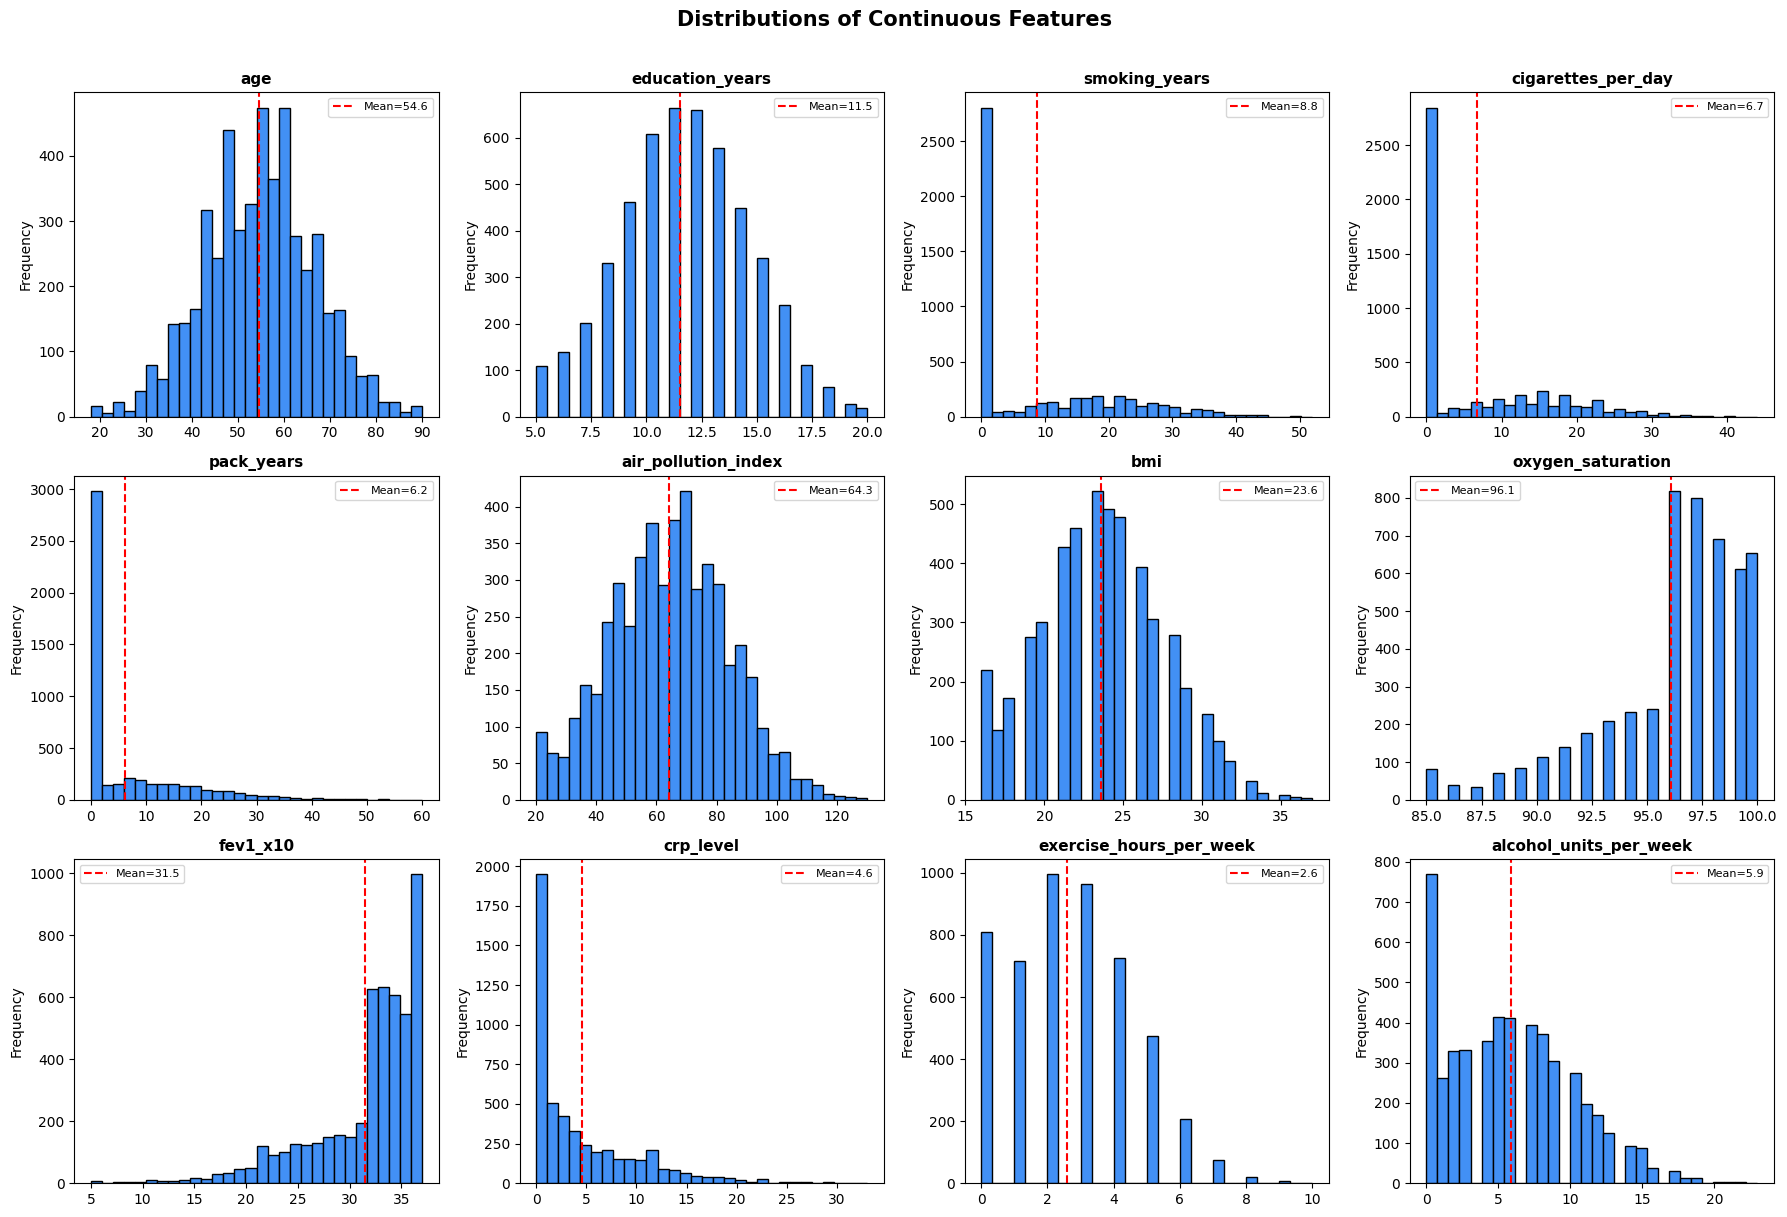

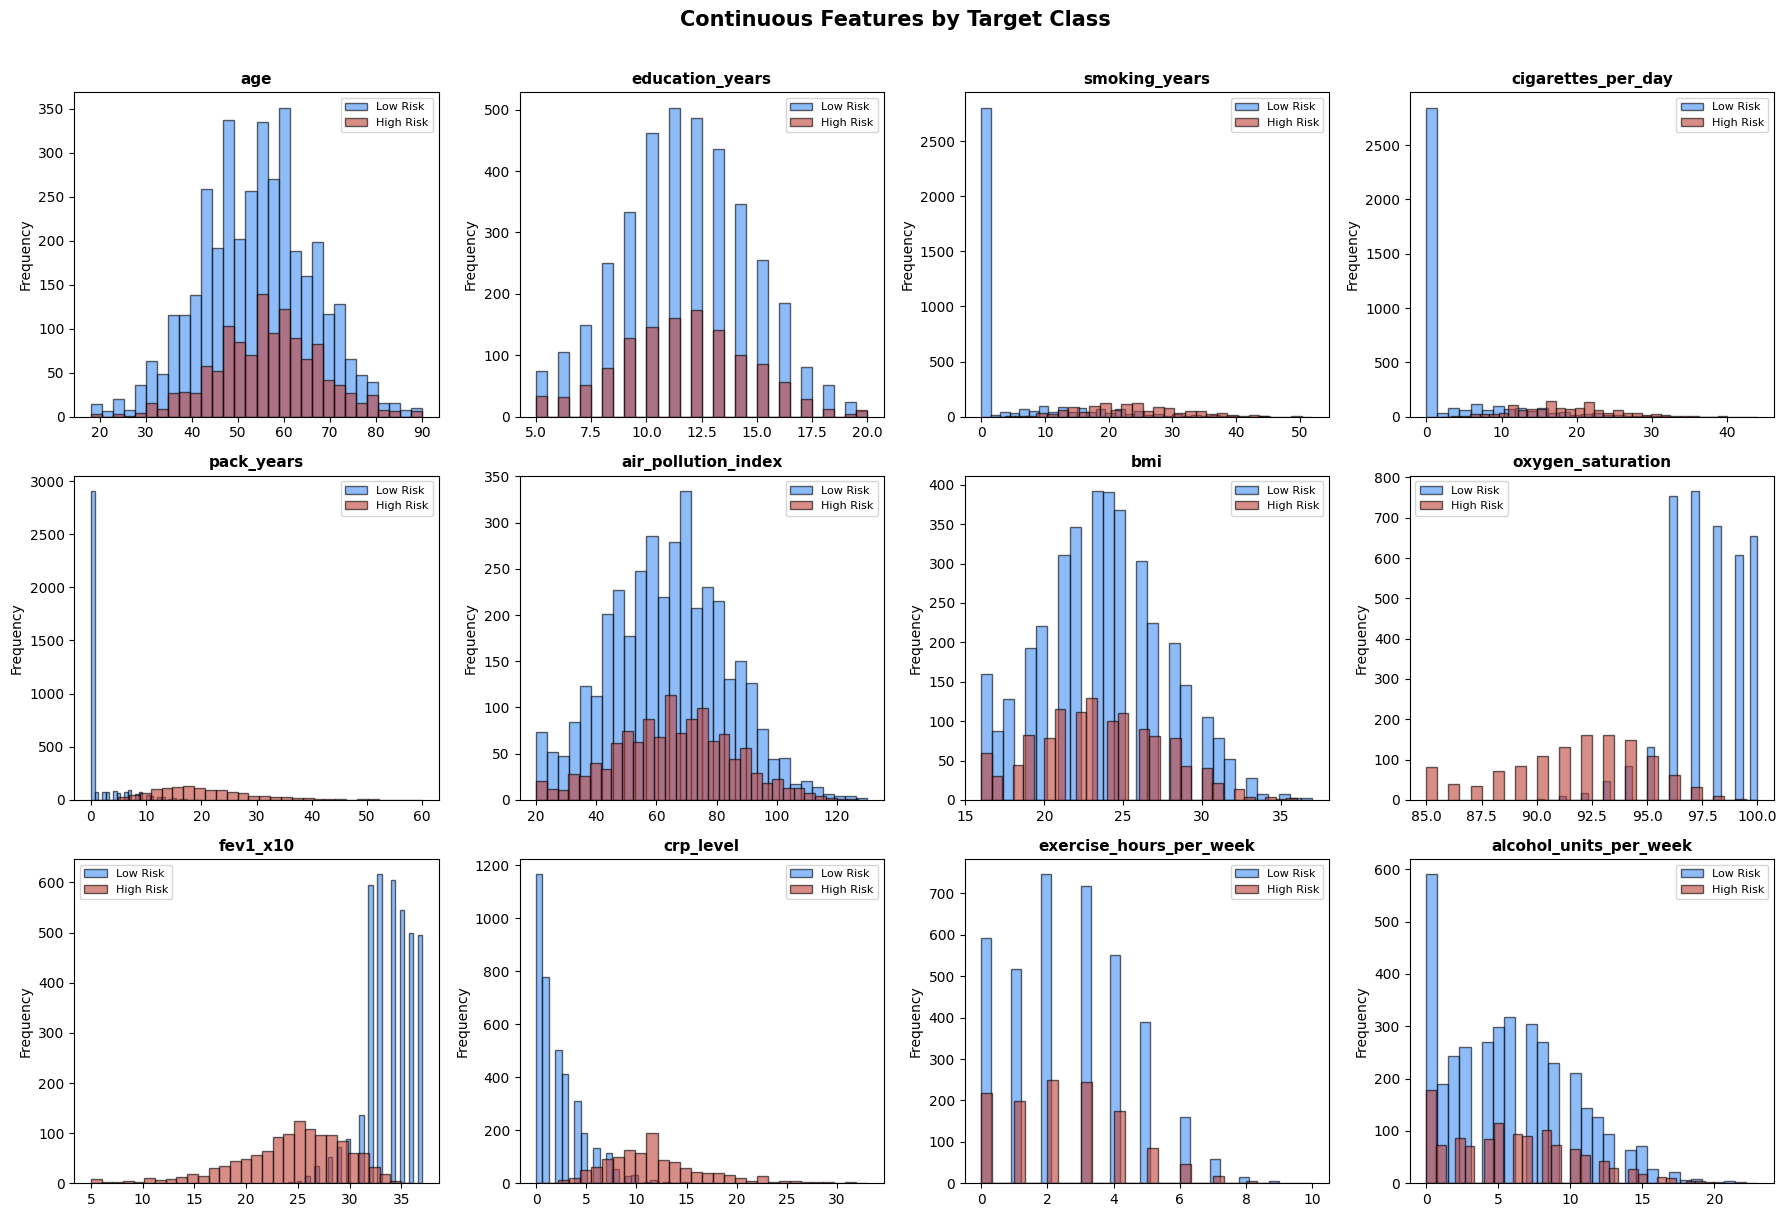

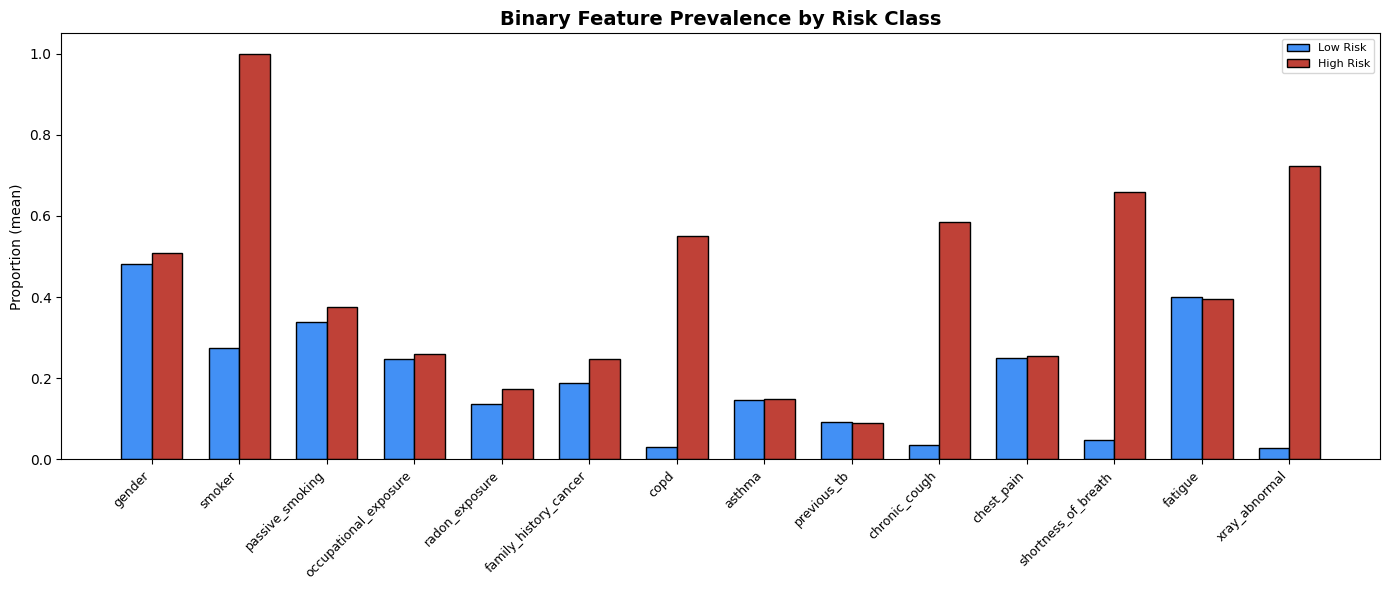

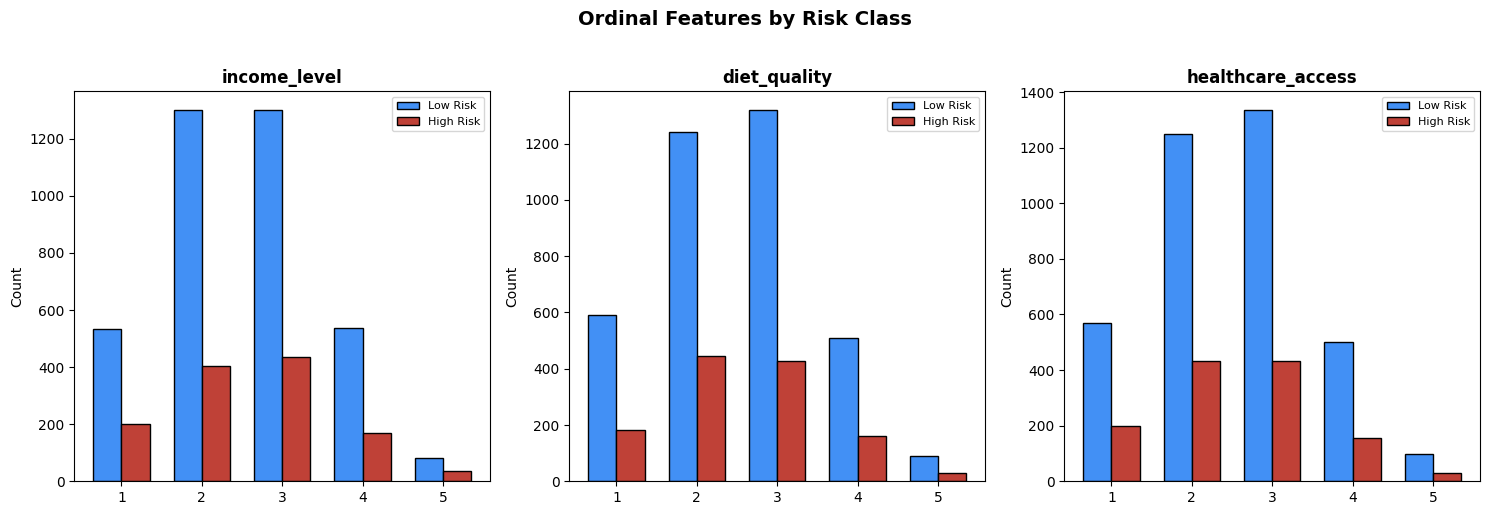

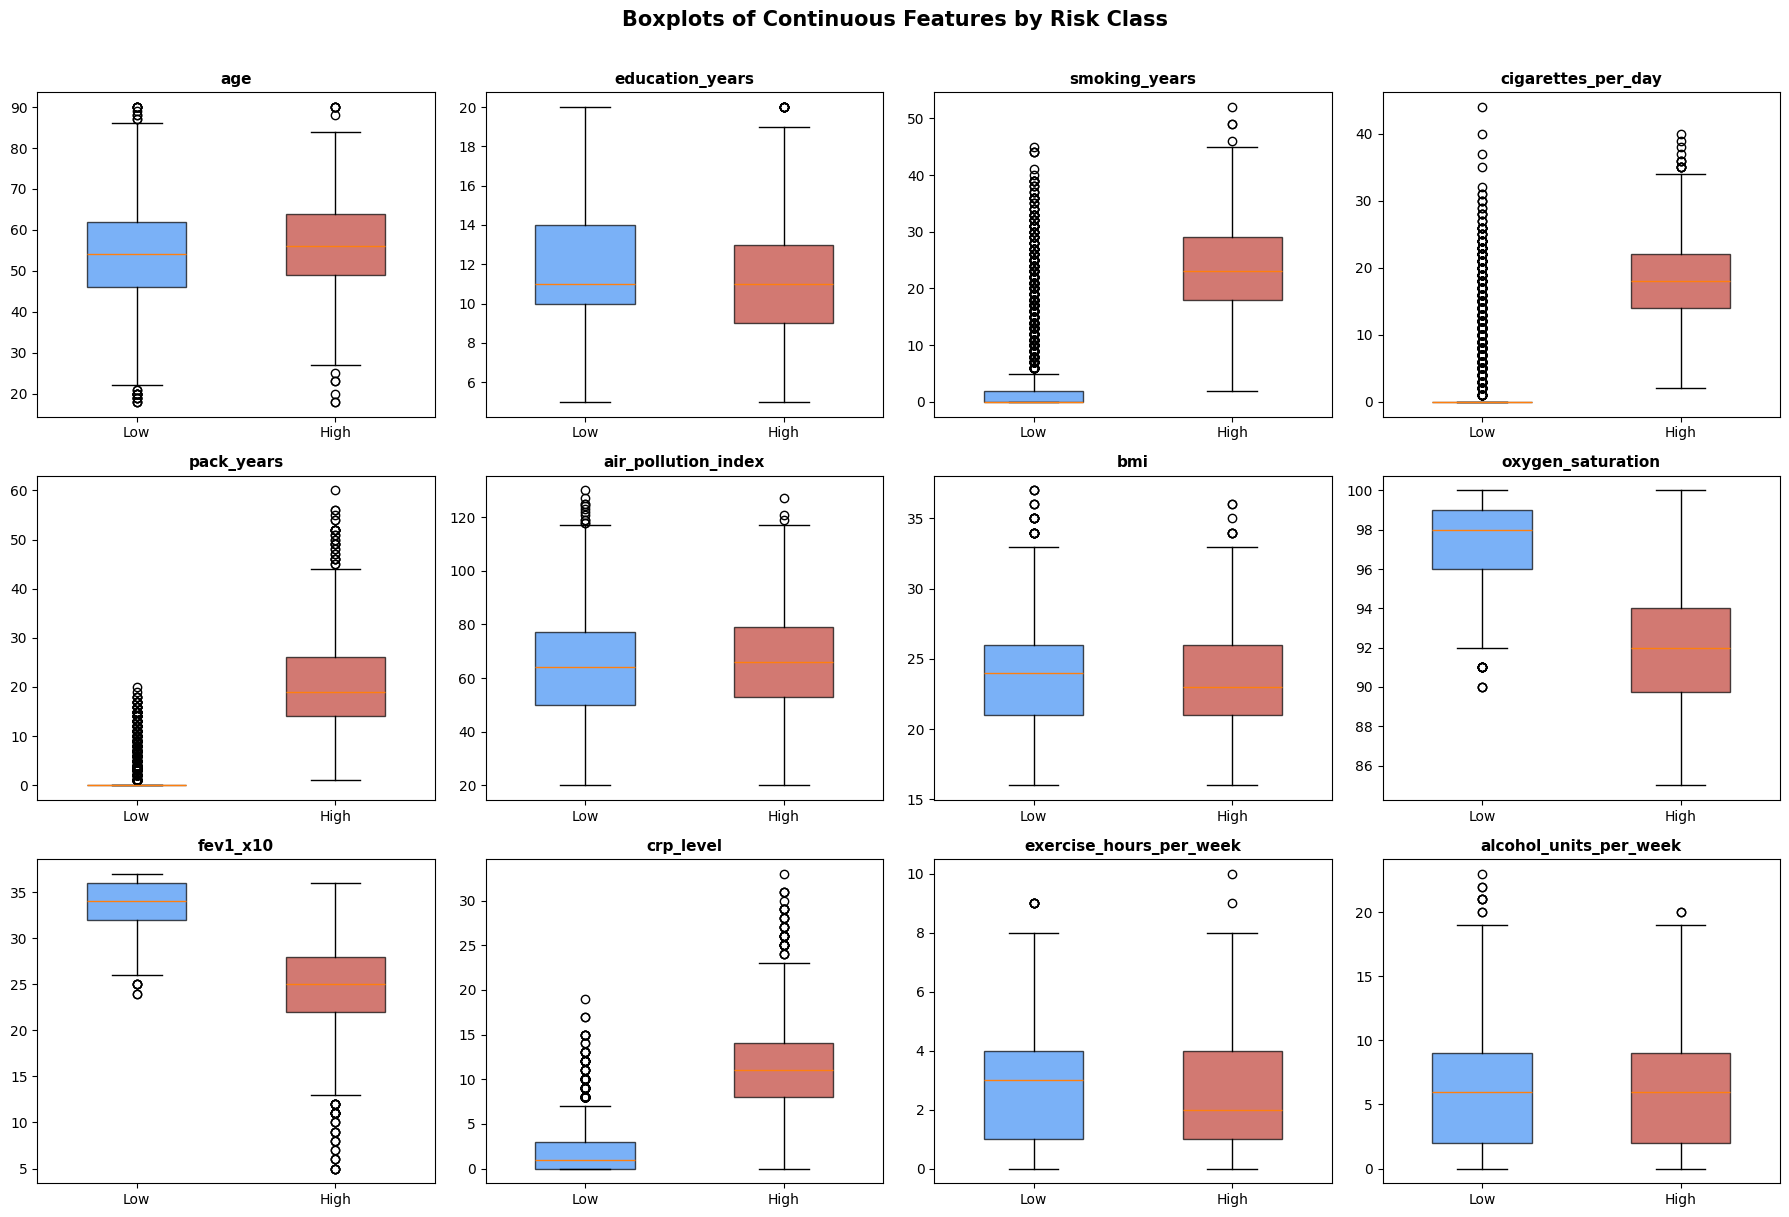

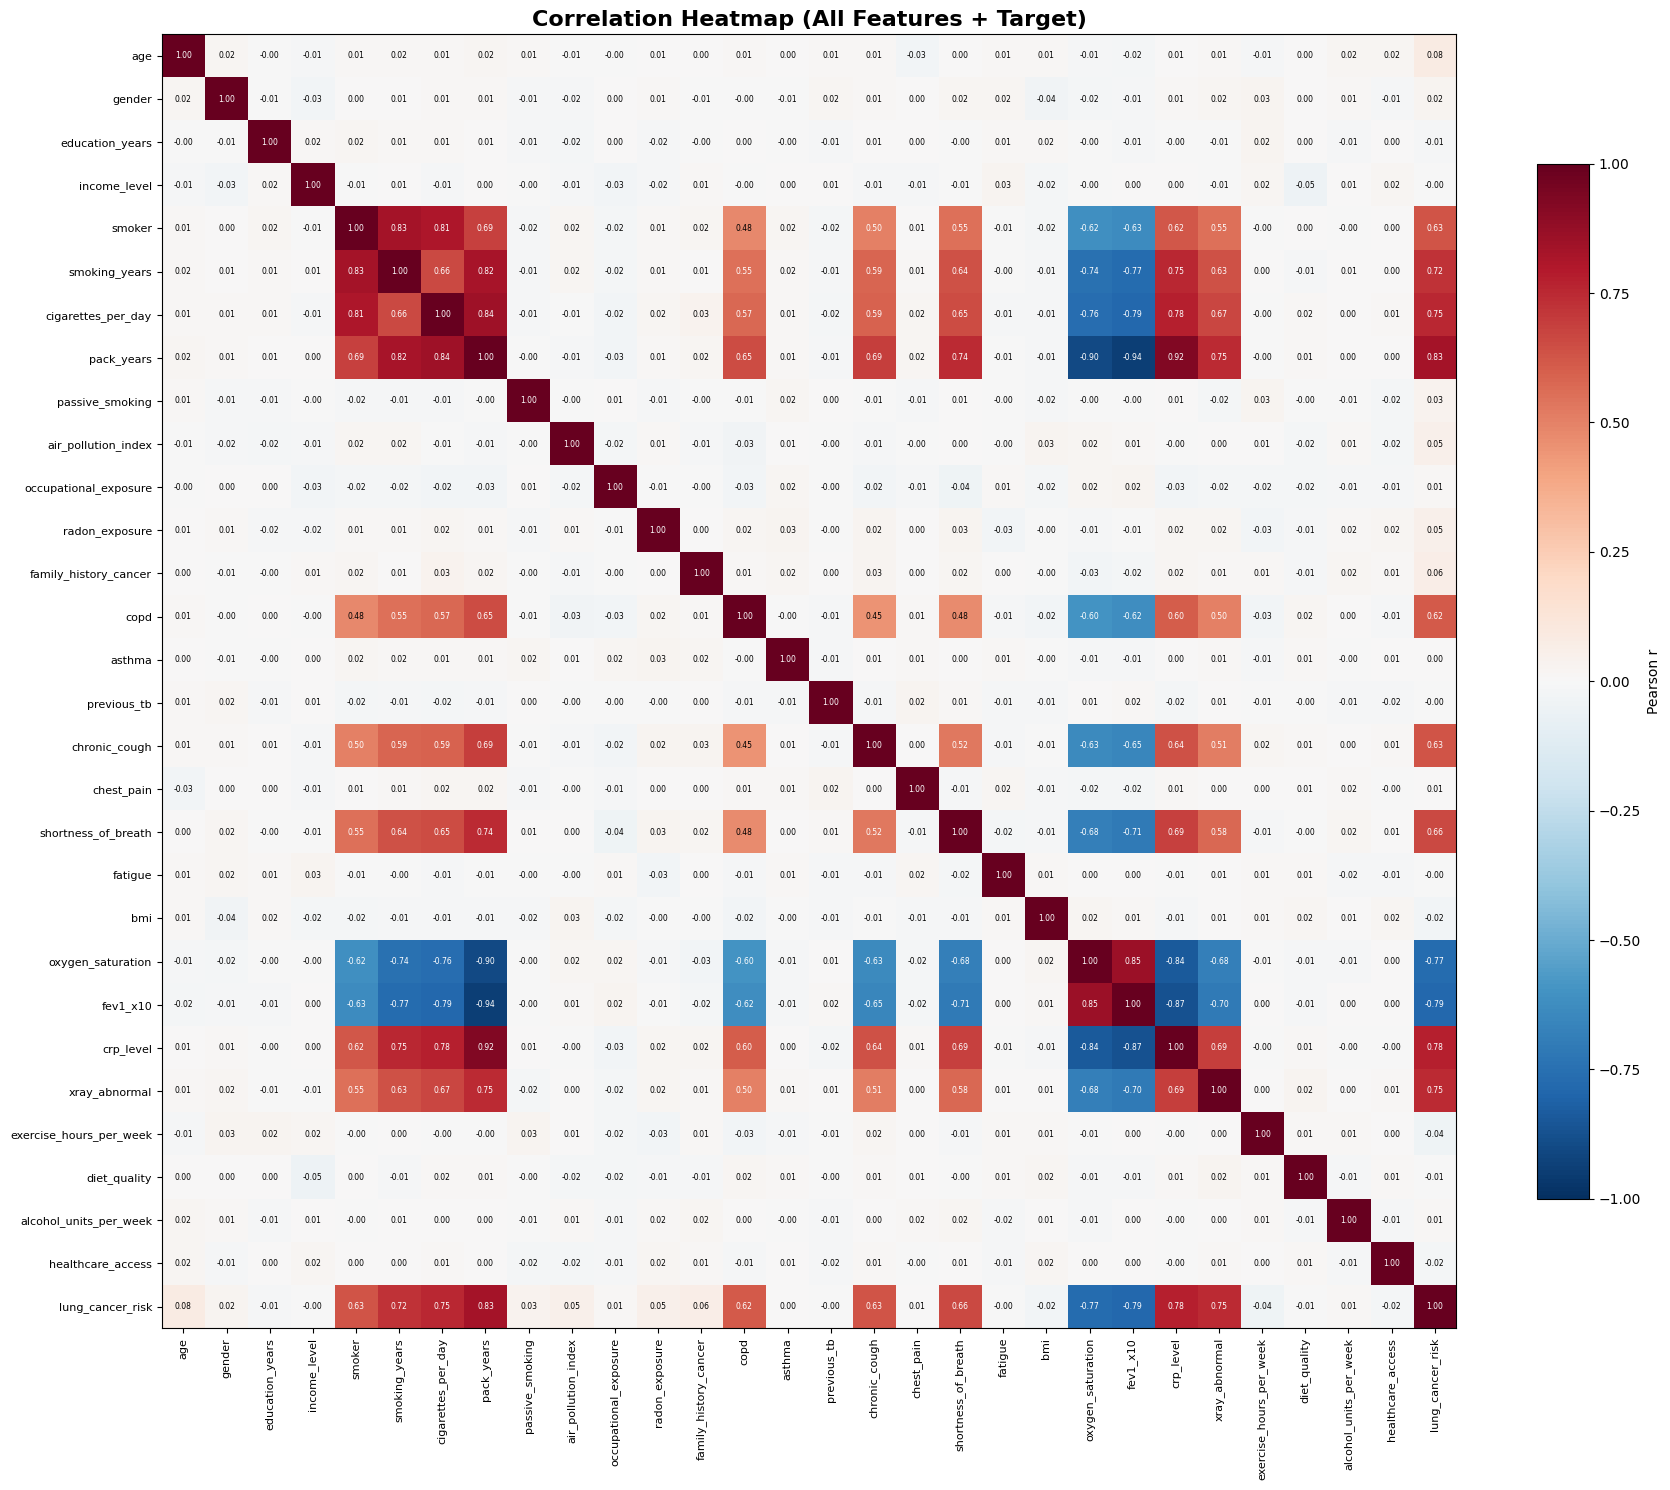

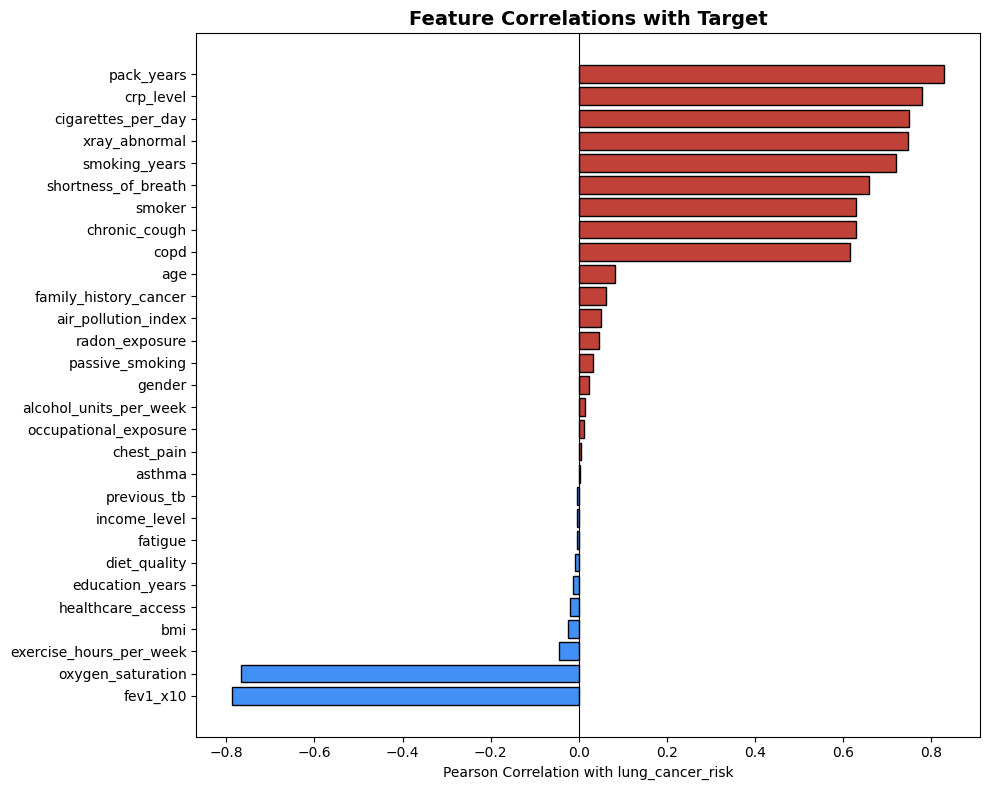


======== Descriptive Stats by Risk Class ========
                                     mean    std  median
risk_class feature                                      
0          age                      53.99  12.07    54.0
           air_pollution_index      63.72  19.49    64.0
           alcohol_units_per_week    5.85   4.40     6.0
           bmi                      23.66   3.93    24.0
           cigarettes_per_day        2.78   5.84     0.0
           crp_level                 2.20   2.49     1.0
           education_years          11.53   2.94    11.0
           exercise_hours_per_week   2.63   1.84     3.0
           fev1_x10                 33.84   2.27    34.0
           oxygen_saturation        97.59   1.74    98.0
           pack_years                1.49   3.32     0.0
           smoking_years             3.98   8.05     0.0
1          age                      56.30  11.35    56.0
           air_pollution_index      65.97  19.37    66.0
           alcohol_units_per_week    

/tmp/ipython-input-3170494613.py:315: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  grouped_stacked = grouped.stack(level=0)


In [5]:
"""
====================================================================================
LUNG CANCER RISK PREDICTION DATASET — COLUMN REFERENCE
====================================================================================
Source: https://www.kaggle.com/datasets/dhrubangtalukdar/lung-cancer-prediction-dataset
Rows:   5,000
Cols:   30 (29 features + 1 target)
All columns are integer-encoded.
====================================================================================

COLUMN                   TYPE        RANGE       DESCRIPTION
------------------------------------------------------------------------------------
DEMOGRAPHICS
  age                    Continuous  18–90       Patient age in years
  gender                 Binary      0, 1        0 = Female, 1 = Male
  education_years        Continuous  5–20        Years of formal education
  income_level           Ordinal     1–5         Socioeconomic bracket (1=lowest, 5=highest)

SMOKING HISTORY
  smoker                 Binary      0, 1        Current/former smoker flag
  smoking_years          Continuous  0–52        Duration of smoking habit (years)
  cigarettes_per_day     Continuous  0–44        Average daily cigarette consumption
  pack_years             Continuous  0–60        (cigarettes_per_day / 20) × smoking_years
  passive_smoking        Binary      0, 1        Regular secondhand smoke exposure

ENVIRONMENTAL EXPOSURES
  air_pollution_index    Continuous  20–130      Local air quality index (higher = worse)
  occupational_exposure  Binary      0, 1        Workplace carcinogen exposure (dust, chemicals, etc.)
  radon_exposure         Binary      0, 1        Residential radon gas exposure

MEDICAL HISTORY
  family_history_cancer  Binary      0, 1        First-degree relative with cancer
  copd                   Binary      0, 1        Chronic Obstructive Pulmonary Disease diagnosis
  asthma                 Binary      0, 1        Asthma diagnosis
  previous_tb            Binary      0, 1        History of tuberculosis

SYMPTOMS (⚠ potential data leakage — may be consequences, not causes)
  chronic_cough          Binary      0, 1        Persistent cough present
  chest_pain             Binary      0, 1        Chest pain present
  shortness_of_breath    Binary      0, 1        Dyspnea present
  fatigue                Binary      0, 1        Chronic fatigue present

CLINICAL MEASUREMENTS
  bmi                    Continuous  16–37       Body Mass Index (kg/m²)
  oxygen_saturation      Continuous  85–100      SpO₂ percentage (normal ≥ 95%)
  fev1_x10               Continuous  5–37        Forced Expiratory Volume in 1s × 10
                                                 (divide by 10 for liters; normal ~3–4 L)
  crp_level              Continuous  0–33        C-Reactive Protein (mg/L); inflammation marker
  xray_abnormal          Binary      0, 1        Chest X-ray shows abnormality

LIFESTYLE
  exercise_hours_per_week Continuous 0–10        Weekly exercise hours
  diet_quality           Ordinal     1–5         Self-reported diet quality (1=poor, 5=excellent)
  alcohol_units_per_week Continuous  0–23        Weekly alcohol consumption (units)
  healthcare_access      Ordinal     1–5         Access to healthcare services (1=poor, 5=excellent)

TARGET
  lung_cancer_risk       Binary      0, 1        0 = Low risk, 1 = High risk

====================================================================================
NOTES:
- pack_years ≈ (cigarettes_per_day / 20) × smoking_years  → multicollinearity risk
- Symptom columns may reflect existing disease, not just risk factors (leakage)
- fev1_x10 is scaled by 10; divide by 10 for standard FEV1 in liters
- All values are integers; no missing data present in raw file
====================================================================================
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import kagglehub


# df = pd.read_csv("data/lung_cancer.csv")
path = kagglehub.dataset_download("dhrubangtalukdar/lung-cancer-prediction-dataset")
df = pd.read_csv(path + '/lung_cancer.csv', sep=',', na_values=" ?", skipinitialspace=True)
TARGET = "lung_cancer_risk"

# =========== EDA =============
print("======== Preview of Data ======== ")
print(f"Sample of the data:\n{df.head()}")
print(f"\n(Rows, Columns) = {df.shape}\n")
df.info()
print(f"\nDescribe (numeric data): {df.describe()}")
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")
print(f"\nNumber of Null Values: {df.isnull().sum().sum()}")
print(f"\nProportion of high-risk patients: {(df[TARGET].sum() / len(df[TARGET])) * 100}%")

# Categorizing columns by type using Claude
BINARY_COLS = [
    "gender", "smoker", "passive_smoking", "occupational_exposure",
    "radon_exposure", "family_history_cancer", "copd", "asthma",
    "previous_tb", "chronic_cough", "chest_pain", "shortness_of_breath",
    "fatigue", "xray_abnormal"
]

ORDINAL_COLS = ["income_level", "diet_quality", "healthcare_access"]

CONTINUOUS_COLS = [
    "age", "education_years", "smoking_years", "cigarettes_per_day",
    "pack_years", "air_pollution_index", "bmi", "oxygen_saturation",
    "fev1_x10", "crp_level", "exercise_hours_per_week",
    "alcohol_units_per_week"
]

# Color constants
PROPER_BLUE = "#4290f5"
PROPER_RED = "#bf4137"
EDGE = "black"


# =========== Helper Functions =============

def subplotting(columns, plot_func, suptitle, figsize=(18, 12)):
    """
    Creates grid of subplots and applies the plot_func to each component.
    """
    fig, axes = plt.subplots(3, 4, figsize=figsize)
    axes = axes.flatten()

    # FIX 1: Only the plot_func call belongs inside the loop.
    #        Everything else (hide unused, suptitle, layout, show) goes AFTER.
    for i, col in enumerate(columns):
        plot_func(axes[i], col)

    # Hide unused plots — outside the loop
    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)

    fig.suptitle(suptitle, fontsize=15, fontweight="bold", y=1.01)
    plt.tight_layout()
    plt.show()


def grouped_bar(categories, heights_low, heights_high, ax, ylabel="Count"):
    """
    Draws a side-by-side grouped bar chart on given axes.
    """
    # FIX 2a: np.arange (not np.arrange)
    # FIX 2b: np.arange(len(categories)) to get integer positions
    x = np.arange(len(categories))
    bar_width = 0.35

    # FIX 2c: parameter names now match what's used inside
    # FIX 2d: PROPER_BLUE / PROPER_RED instead of undefined C_LOW / C_HIGH
    ax.bar(x - bar_width / 2, heights_low, bar_width, label="Low Risk",
           color=PROPER_BLUE, edgecolor=EDGE)
    ax.bar(x + bar_width / 2, heights_high, bar_width, label="High Risk",
           color=PROPER_RED, edgecolor=EDGE)

    ax.set_xticks(x)
    ax.set_ylabel(ylabel)
    ax.legend(fontsize=8)
    # FIX 2e: removed tight_layout()/show() — this is a helper that draws
    #         on a single axes, the caller handles layout and display


# =========== Plots =============

# ---- 1. Target Distribution ----
fig, ax = plt.subplots(figsize=(8, 6))
counts = df[TARGET].value_counts().sort_index()
bars = ax.bar(["Low Risk (0)", "High Risk (1)"],
              counts.values,
              color=[PROPER_BLUE, PROPER_RED],
              edgecolor=EDGE)

for bar, count in zip(bars, counts.values):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 40,
            # FIX 3: added :.1f to format percentage to one decimal place
            f"{count}\n({count / len(df) * 100:.1f}%)",
            ha="center",
            va="bottom",
            fontsize=10)

ax.set_title("Target Variable Distribution",
             fontsize=14, fontweight="bold")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


# ---- 2. Histograms of Continuous Features ----
def plot_hist(ax, col):
    """
    Approximating probability density function.
    """
    ax.hist(df[col], bins=30, color=PROPER_BLUE, edgecolor=EDGE)

    mu = df[col].mean()
    ax.axvline(mu, color="red", linestyle="--", label=f"Mean={mu:.1f}")

    ax.set_title(col, fontsize=11, fontweight="bold")
    ax.set_ylabel("Frequency")
    ax.legend(fontsize=8)

# FIX 4: was calling subplot_grid (doesn't exist) — now calls subplotting
subplotting(CONTINUOUS_COLS, plot_hist,
            "Distributions of Continuous Features")


# ---- 3. Histograms Split by Target ----
def plot_hist_by_target(ax, col):
    """
    Plots overlapping histograms colored by target class.
    """
    for val, color, label in [(0, PROPER_BLUE, "Low Risk"),
                               (1, PROPER_RED, "High Risk")]:
        ax.hist(df.loc[df[TARGET] == val, col], bins=30,
                # FIX 5: added alpha so both histograms are visible
                alpha=0.6,
                color=color,
                edgecolor=EDGE,
                label=label)

    ax.set_title(col, fontsize=11, fontweight="bold")
    ax.set_ylabel("Frequency")
    ax.legend(fontsize=8)
    # FIX 6: removed tight_layout()/show() — subplotting handles that

# FIX 4 again: was subplot_grid, now subplotting
subplotting(CONTINUOUS_COLS, plot_hist_by_target,
            "Continuous Features by Target Class")


# ---- 4. Binary Feature Prevalence by Target ----
fig, ax = plt.subplots(figsize=(14, 6))
# FIX 7: keyword arg names now match the function signature
grouped_bar(
    categories=BINARY_COLS,
    heights_low=df[df[TARGET] == 0][BINARY_COLS].mean(),
    heights_high=df[df[TARGET] == 1][BINARY_COLS].mean(),
    ax=ax,
    ylabel="Proportion (mean)"
)
ax.set_xticklabels(BINARY_COLS, rotation=45, ha="right", fontsize=9)
ax.set_title("Binary Feature Prevalence by Risk Class",
             fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


# ---- 5. Ordinal Feature Distributions by Target ----
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(ORDINAL_COLS):
    categories = sorted(df[col].unique())
    low_counts = (df.loc[df[TARGET] == 0, col]
                  .value_counts().reindex(categories, fill_value=0))
    high_counts = (df.loc[df[TARGET] == 1, col]
                   .value_counts().reindex(categories, fill_value=0))
    grouped_bar(categories, low_counts, high_counts, axes[i])
    axes[i].set_xticklabels(categories)
    axes[i].set_title(col, fontsize=12, fontweight="bold")

fig.suptitle("Ordinal Features by Risk Class",
             fontsize=14, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


# ---- 6. Boxplots by Target ----
def plot_boxplot_by_target(ax, col):
    data = [df.loc[df[TARGET] == v, col] for v in [0, 1]]
    bp = ax.boxplot(data, tick_labels=["Low", "High"],
                    patch_artist=True, widths=0.5)
    for box, color in zip(bp["boxes"], [PROPER_BLUE, PROPER_RED]):
        box.set_facecolor(color)
        box.set_alpha(0.7)
    ax.set_title(col, fontsize=11, fontweight="bold")

# FIX 4 again: was subplot_grid
subplotting(CONTINUOUS_COLS, plot_boxplot_by_target,
            "Boxplots of Continuous Features by Risk Class")


# ---- 7. Correlation Heatmap ----
fig, ax = plt.subplots(figsize=(18, 15))
corr = df.corr()
im = ax.imshow(corr, cmap="RdBu_r", vmin=-1, vmax=1, aspect="auto")
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticklabels(corr.columns, fontsize=8)
for row in range(len(corr)):
    for col_idx in range(len(corr)):
        val = corr.iloc[row, col_idx]
        color = "white" if abs(val) > 0.5 else "black"
        ax.text(col_idx, row, f"{val:.2f}", ha="center", va="center",
                fontsize=5.5, color=color)
fig.colorbar(im, ax=ax, shrink=0.8, label="Pearson r")
ax.set_title("Correlation Heatmap (All Features + Target)",
             fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


# ---- 8. Feature Correlations with Target ----
fig, ax = plt.subplots(figsize=(10, 8))
target_corr = corr[TARGET].drop(TARGET).sort_values()
colors = [PROPER_RED if v > 0 else PROPER_BLUE for v in target_corr.values]
ax.barh(target_corr.index, target_corr.values, color=colors, edgecolor=EDGE)
ax.set_xlabel("Pearson Correlation with lung_cancer_risk")
ax.set_title("Feature Correlations with Target",
             fontsize=14, fontweight="bold")
ax.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()


# =========== Additional Descriptive Stats =============

print("\n======== Descriptive Stats by Risk Class ========")
grouped = df.groupby(TARGET)[CONTINUOUS_COLS].agg(["mean", "std", "median"])
grouped_stacked = grouped.stack(level=0)
grouped_stacked.index.names = ["risk_class", "feature"]
print(grouped_stacked.round(2).to_string())

print("\n======== Skewness & Kurtosis (Continuous Features) ========")
skew_kurt = pd.DataFrame({
    "Skewness": df[CONTINUOUS_COLS].skew(),
    "Kurtosis": df[CONTINUOUS_COLS].kurtosis()
}).round(3)
print(skew_kurt.to_string())

# ======== REMOVE REDUNCANCIES SO TO MAINTAIN INDEPENDENT PREDICTORS ====
# pack_years  = (cigs_per_day / 20) * smoking_years, so just keep pack_years
df.drop(["smoking_years", "cigarettes_per_day", "passive_smoking"],
        inplace=True, axis=1) # Do we want to keep 'passive_smoking' ?

# ======== Separate causes from consequences (Use for 2nd model!) ==========
# Potential leakage (could cause or result from disease)
leaks = ["chronic_cough", "chest_pain", "shortness_of_breath",
         "fatigue", "oxygen_saturation", "fev1_x10", "crp_level", "xray_abnormal"]
# Remove the leaks
no_sympt_df = df.drop(leaks, axis=1)

# Stronger predictors will be those features available at intake, then
# lifestyle and socioeconomic features ...


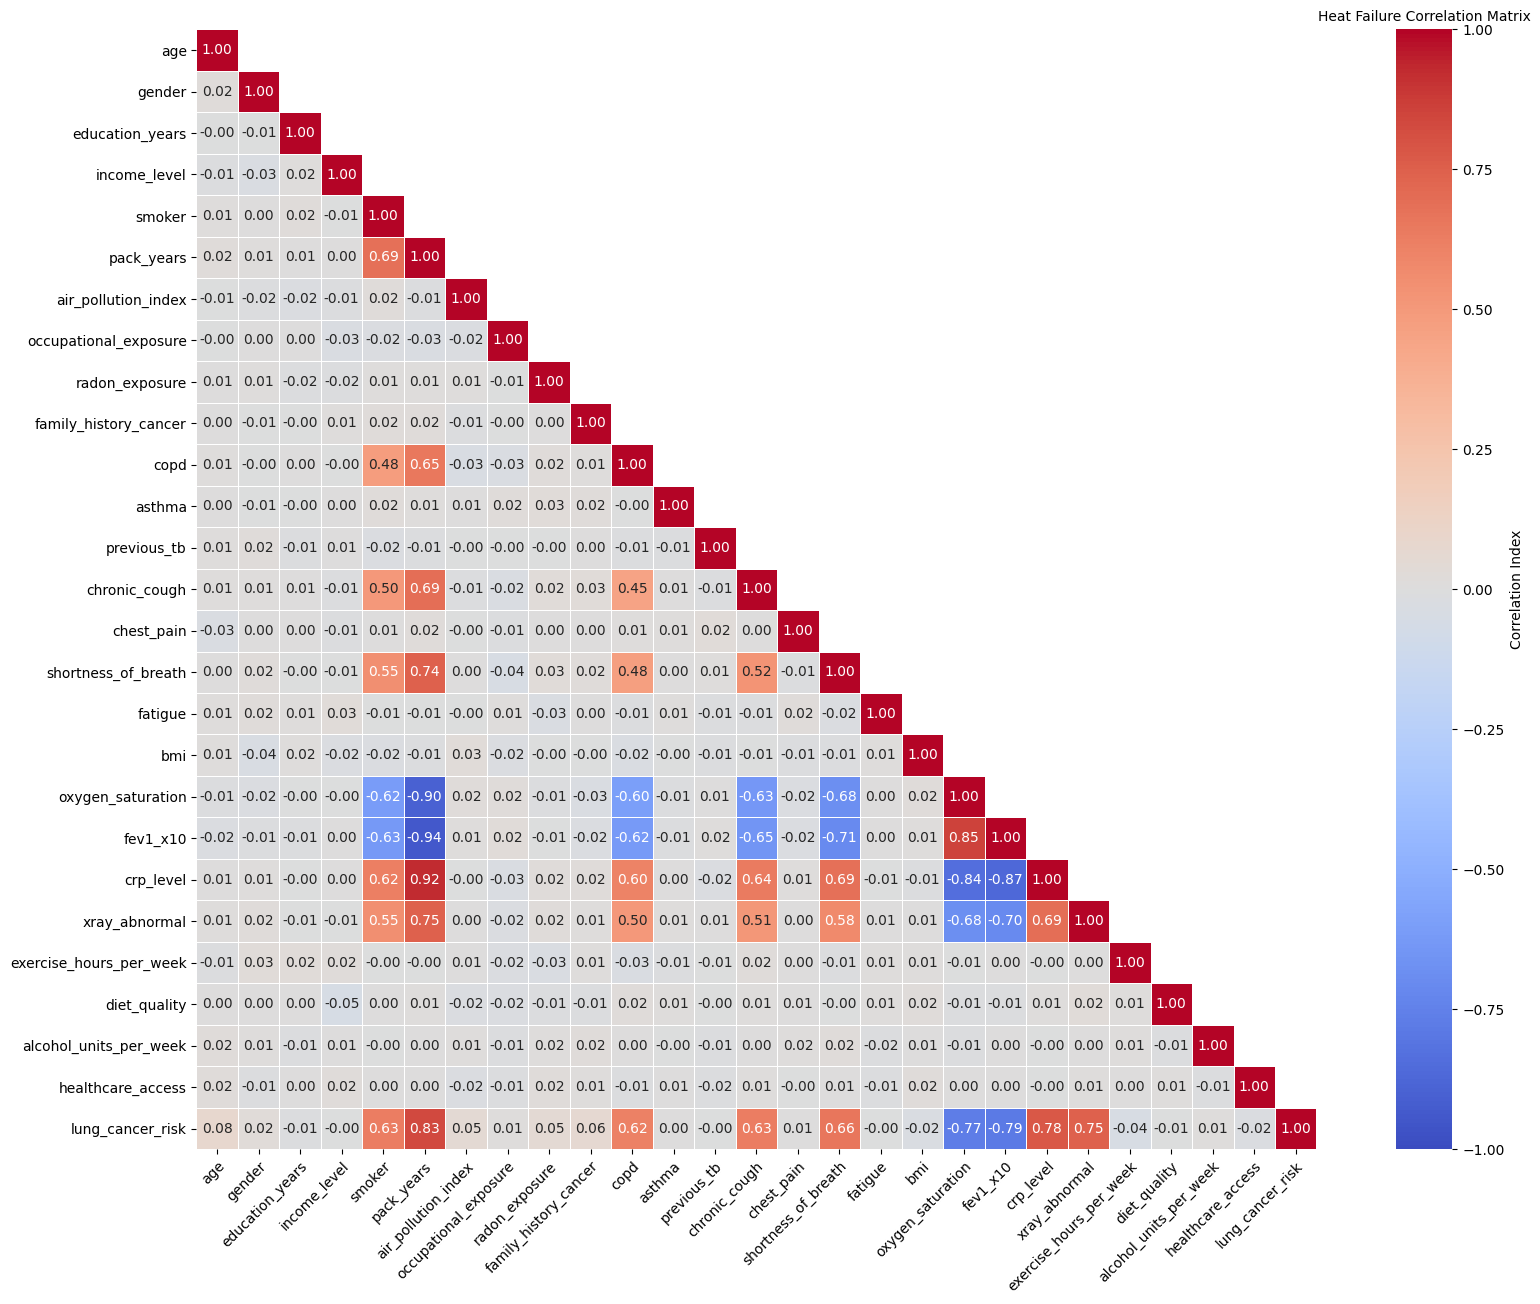

In [7]:
#Victoria - adding additonal plots, we can compare and choose the ones that are informative

#!pip install eda_toolkit
#(Shpaner & Gil, 2024)
from eda_toolkit import flex_corr_matrix

df_num = df.select_dtypes(np.number)
flex_corr_matrix(
    df=df,
    cols=df_num.columns.to_list(),
    annot=True,
    cmap="coolwarm",
    figsize=(18, 14),
    title="Heat Failure Correlation Matrix",
    xlabel_alignment="right",
    label_fontsize=10,
    tick_fontsize=10,
    xlabel_rot=45,
    ylabel_rot=0,
    text_wrap=50,
    vmin=-1,
    vmax=1,
    cbar_label="Correlation Index",
    triangular=True,
)

Text(0.5, 1.0, 'Abnormal Xray By Lung Cancer Risk')

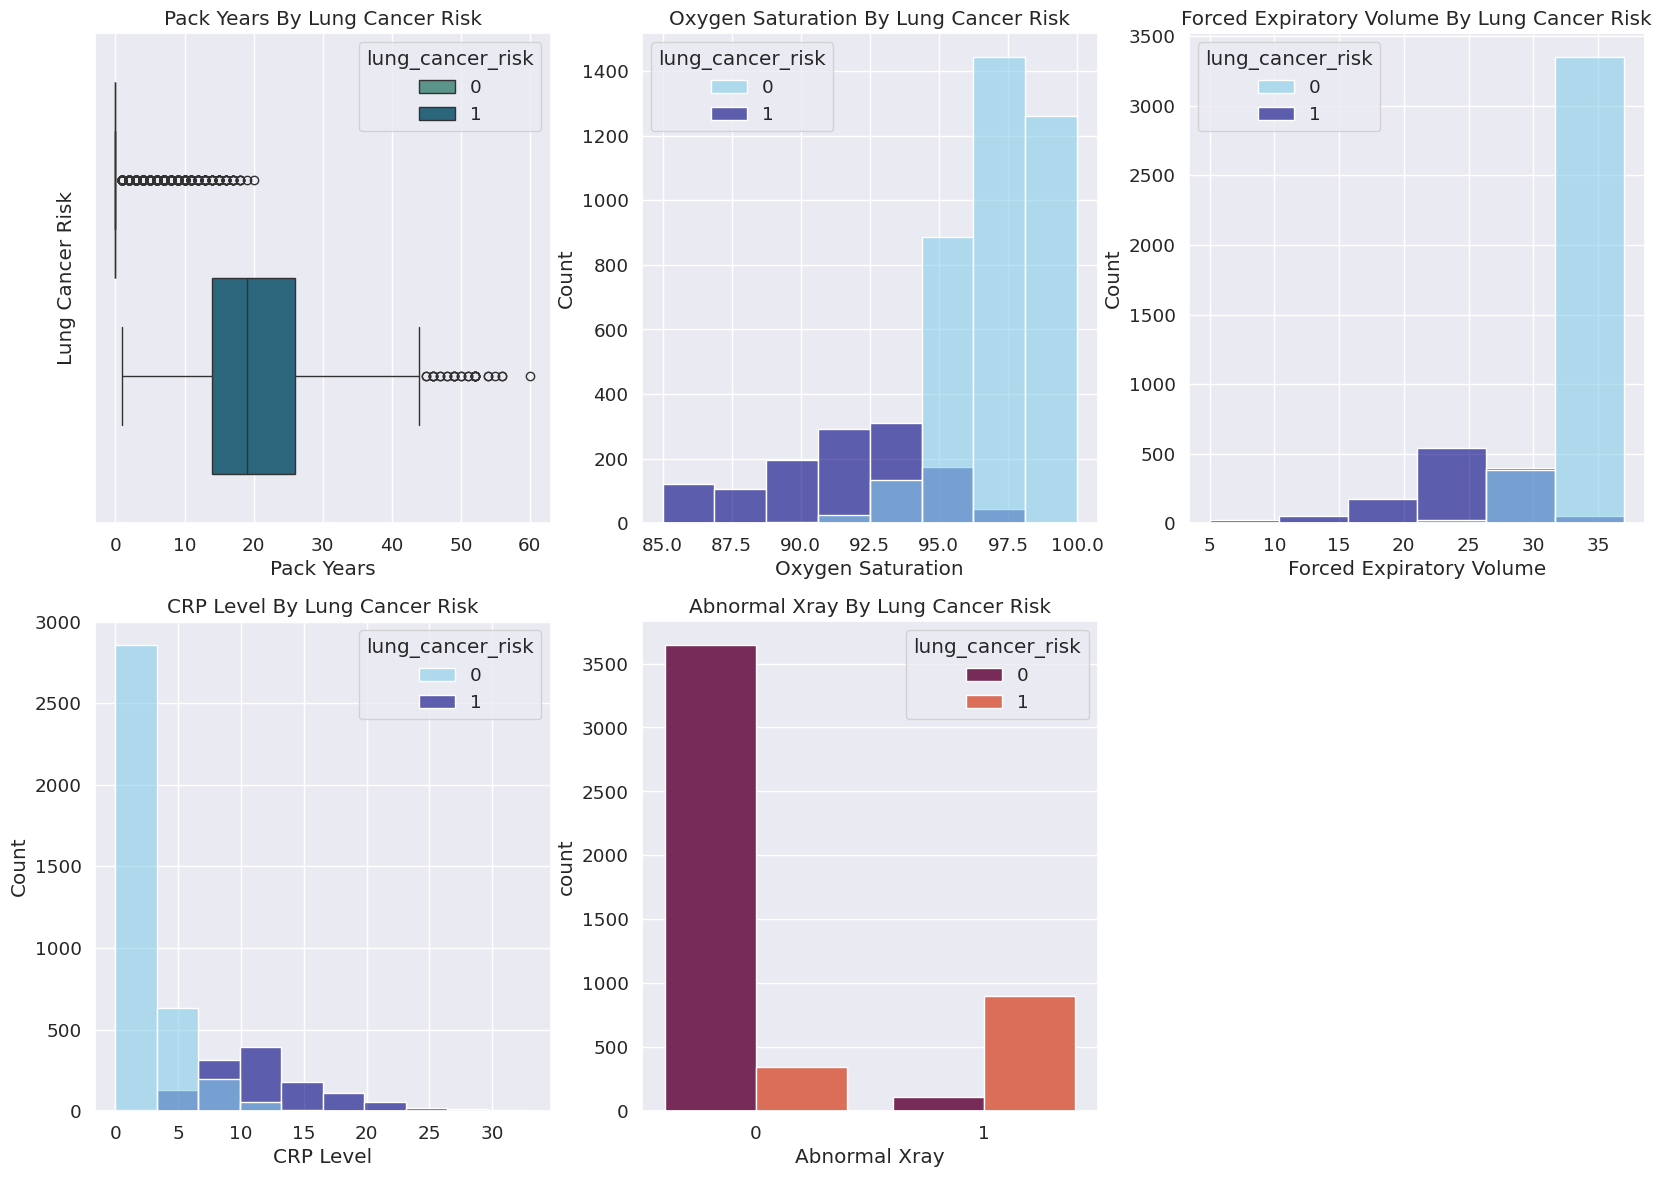

In [49]:
#Seaborn EDA Plots
#(Hunter, 2007; Waskom, 2021)
import seaborn as sns

#Setting up the figure and theme
sns.set(font_scale=1.2, style="darkgrid")
custom_palette = {0: 'skyblue', 1: 'navy'}
plt.figure(figsize=(20,14))

#Plots
plt.subplot(2,3,1)
sns.boxplot(data=df, x="pack_years", hue='lung_cancer_risk', palette="crest");
plt.ylabel("Lung Cancer Risk")
plt.xlabel("Pack Years")
plt.title("Pack Years By Lung Cancer Risk")

plt.subplot(2,3,2)
sns.histplot(data=df, x='oxygen_saturation', hue='lung_cancer_risk', palette=custom_palette, bins=8, alpha=0.6)
plt.xlabel("Oxygen Saturation")
plt.title("Oxygen Saturation By Lung Cancer Risk")

plt.subplot(2,3,3)
sns.histplot(data=df, x='fev1_x10', hue='lung_cancer_risk',  palette=custom_palette, bins=6, alpha=0.6)
plt.xlabel("Forced Expiratory Volume")
plt.title("Forced Expiratory Volume By Lung Cancer Risk")

plt.subplot(2,3,4)
sns.histplot(data=df, x='crp_level', hue='lung_cancer_risk',  palette=custom_palette, bins=10, alpha=0.6)
plt.xlabel("CRP Level")
plt.title("CRP Level By Lung Cancer Risk")

plt.subplot(2,3,5)
sns.countplot(data=df, x='xray_abnormal', hue='lung_cancer_risk', palette="rocket")
plt.xlabel("Abnormal Xray")
plt.title("Abnormal Xray By Lung Cancer Risk")

References:

Shpaner, L., & Gil, O. (2024). EDA Toolkit (Version 0.2.2) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.13162633

Waskom, M. L. (2021). seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021